In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score

In [4]:
# load our dataset
data = pd.read_csv('Wholesale customers data.csv')

data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# normalise dataset
data_norm = normalize(data)

# try standard scaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# try normalising
data_norm = pd.DataFrame(data_norm, columns=data.columns)
data_norm.head()
data_norm.describe()

data_scaled.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


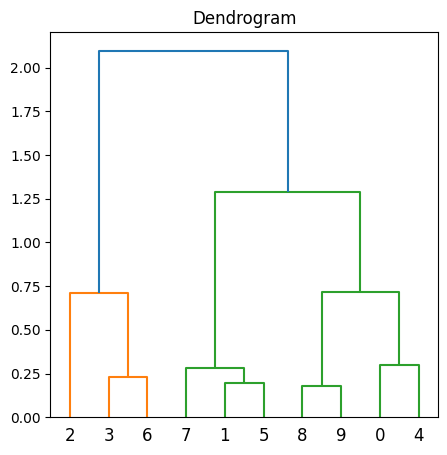

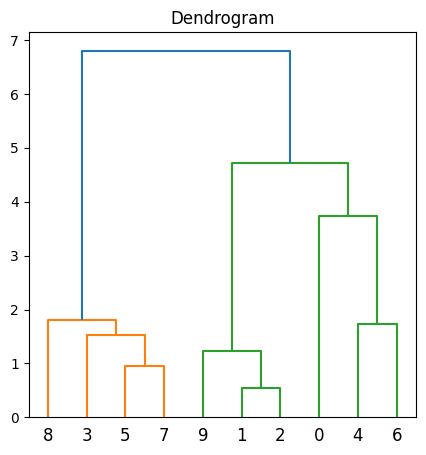

In [7]:
# plot the dendrogram
subset_data_norm = data_norm.sample(n=10)
subset_data_scaled = data_scaled.sample(n=10)

plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend_norm = shc.dendrogram(shc.linkage(subset_data_norm, method='ward'))

plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend_scaled = shc.dendrogram(shc.linkage(subset_data_scaled, method='ward'))

In [16]:
# deciding the number of components 
pca_norm = PCA()
pca_norm.fit(data_norm)

pca_scaled = PCA()
pca_scaled.fit(data_scaled)

# cumulative variance
cum_var_norm = np.cumsum(pca_norm.explained_variance_ratio_)
cum_var_scaled = np.cumsum(pca_scaled.explained_variance_ratio_)

# choose the number of components to keep based on 95% variance
n_components_norm = np.argmax(cum_var_norm >= 0.95)
n_components_scaled = np.argmax(cum_var_scaled >= 0.95)

print(n_components_norm) # 3 means index 3 and so 4 components
print(n_components_scaled) # 5 means index 5 and so 6 components

3
5


In [18]:
# dimensionality reduction

pca_norm = PCA(n_components=4)
pca_scaled = PCA(n_components=6)

reduced_data_norm = pca_norm.fit_transform(data_norm)
reduced_data_scaled = pca_scaled.fit_transform(data_scaled)

Text(0, 0.5, 'Distortions (WCSS)')

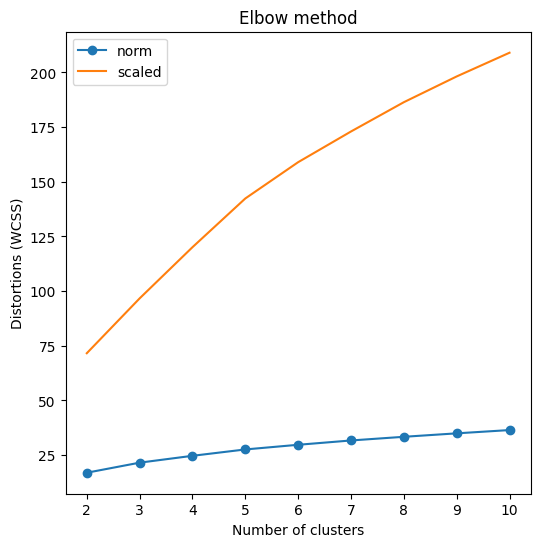

In [28]:
# elbow method
k_values = range(2,11)

# create a list to hold the distortion for each of the k values
distortions_norm = []
distortions_scaled = []

# loop to calculate the distortion for each value of k, 2 - 10
for k in k_values:
    agg_clus_norm = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agg_clus_scaled = AgglomerativeClustering(n_clusters=k, linkage='ward')

    agg_clus_norm.fit(reduced_data_norm)
    agg_clus_scaled.fit(reduced_data_scaled)

    lin_mat_norm = linkage(reduced_data_norm, method='ward')
    lin_mat_scaled = linkage(reduced_data_scaled, method='ward')

    distortions_norm.append(sum(lin_mat_norm[:,2][-k:]))
    distortions_scaled.append(sum(lin_mat_scaled[:,2][-k:]))

# plot the distortion chart

plt.figure(figsize=(6,6))
plt.plot(k_values, distortions_norm, marker= 'o', label = 'norm')
plt.plot(k_values, distortions_scaled, label = 'scaled')
plt.title('Elbow method')
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Distortions (WCSS)')    

In [31]:
# set the k values
k_values = range(2,11)

# define a list to hold the silhouette score for each k value
sil_score_norm = []
sil_score_scaled = []

# calculate the silhouette score for each value of k
for k in k_values:
    agg_clus_norm = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agg_clus_scaled = AgglomerativeClustering(n_clusters=k, linkage='ward')

    clust_norm = agg_clus_norm.fit_predict(reduced_data_norm)
    clust_scaled = agg_clus_scaled.fit_predict(reduced_data_scaled)

    score_norm = silhouette_score(reduced_data_norm, clust_norm)
    score_scaled = silhouette_score(reduced_data_scaled, clust_scaled)

    sil_score_norm.append(score_norm)
    sil_score_scaled.append(score_scaled)


for k, score in zip(k_values, sil_score_norm):
    print(f"Silhouette Score for k={k}: {score}")

for k, score in zip(k_values, sil_score_scaled):
    print(f"Silhouette Score for k={k}: {score}")

Silhouette Score for k=2: 0.48757626517595165
Silhouette Score for k=3: 0.41286308707112196
Silhouette Score for k=4: 0.37685791262589297
Silhouette Score for k=5: 0.37275958440923695
Silhouette Score for k=6: 0.36592888109477956
Silhouette Score for k=7: 0.3264670580963951
Silhouette Score for k=8: 0.2665468082810888
Silhouette Score for k=9: 0.2650214585225309
Silhouette Score for k=10: 0.2684948706730495
Silhouette Score for k=2: 0.38041813482437364
Silhouette Score for k=3: 0.3659523896149612
Silhouette Score for k=4: 0.36996996421419137
Silhouette Score for k=5: 0.3452697863476058
Silhouette Score for k=6: 0.3589820140795858
Silhouette Score for k=7: 0.36566666064448994
Silhouette Score for k=8: 0.3389860525035206
Silhouette Score for k=9: 0.3312514260955925
Silhouette Score for k=10: 0.33792256413037747


In [33]:
# do our agglomerative clustering
agg_clus_norm = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agg_clus_scaled = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# fit and predict our clusters
clust_pred_norm = agg_clus_norm.fit_predict(reduced_data_norm)
clust_pred_scaled = agg_clus_scaled.fit_predict(reduced_data_scaled)

In [34]:
clust_pred_norm

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [35]:
clust_pred_scaled

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

Text(0.5, 1.0, 'Visual representation of clustering with normalisation')

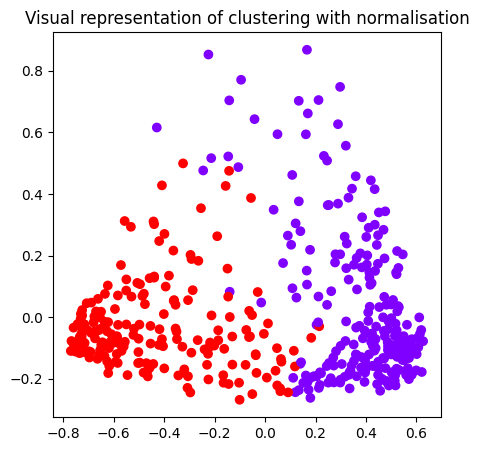

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(x=reduced_data_norm[:,0], y=reduced_data_norm[:,1], c=agg_clus_norm.labels_, cmap='rainbow')
plt.title('Visual representation of clustering with normalisation')

Text(0.5, 1.0, 'Visual representation of clustering with standard scaler')

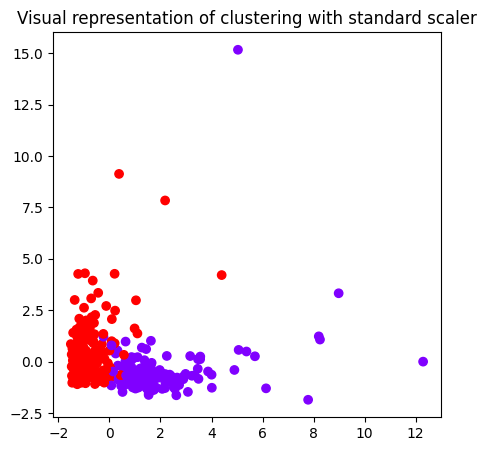

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(x=reduced_data_scaled[:,0], y=reduced_data_scaled[:,1], c=agg_clus_scaled.labels_, cmap='rainbow')
plt.title('Visual representation of clustering with standard scaler')

In [43]:
# add the cluster into the dataframe

data['Cluster_norm'] = agg_clus_norm.labels_
data['Cluster scaled'] = agg_clus_scaled.labels_

data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_norm,Cluster scaled
0,2,3,12669,9656,7561,214,2674,1338,1,0
1,2,3,7057,9810,9568,1762,3293,1776,1,0
2,2,3,6353,8808,7684,2405,3516,7844,1,0
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,0,0
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0,1
436,1,3,39228,1431,764,4510,93,2346,0,1
437,2,3,14531,15488,30243,437,14841,1867,1,0
438,1,3,10290,1981,2232,1038,168,2125,0,1
